In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [5]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


# Preprocess the data

In [6]:
data[data.duplicated(keep=False)] # show duplicate values

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [7]:
data.drop_duplicates(inplace=True) # drop duplicate record

In [8]:
data.nunique() # shows how many unique values are there

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [9]:
data.drop('Cylinders',axis=1,inplace=True) # drop cylinder column cuz it has unique value across the column

In [10]:
data["Fuel_Type"].unique() # shows unique values

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [11]:
data.corr(numeric_only=True)    # shows correlation matrix 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000


In [12]:
data['Fuel_Type'].mode()

0    Petrol
Name: Fuel_Type, dtype: object

# Visualize the data

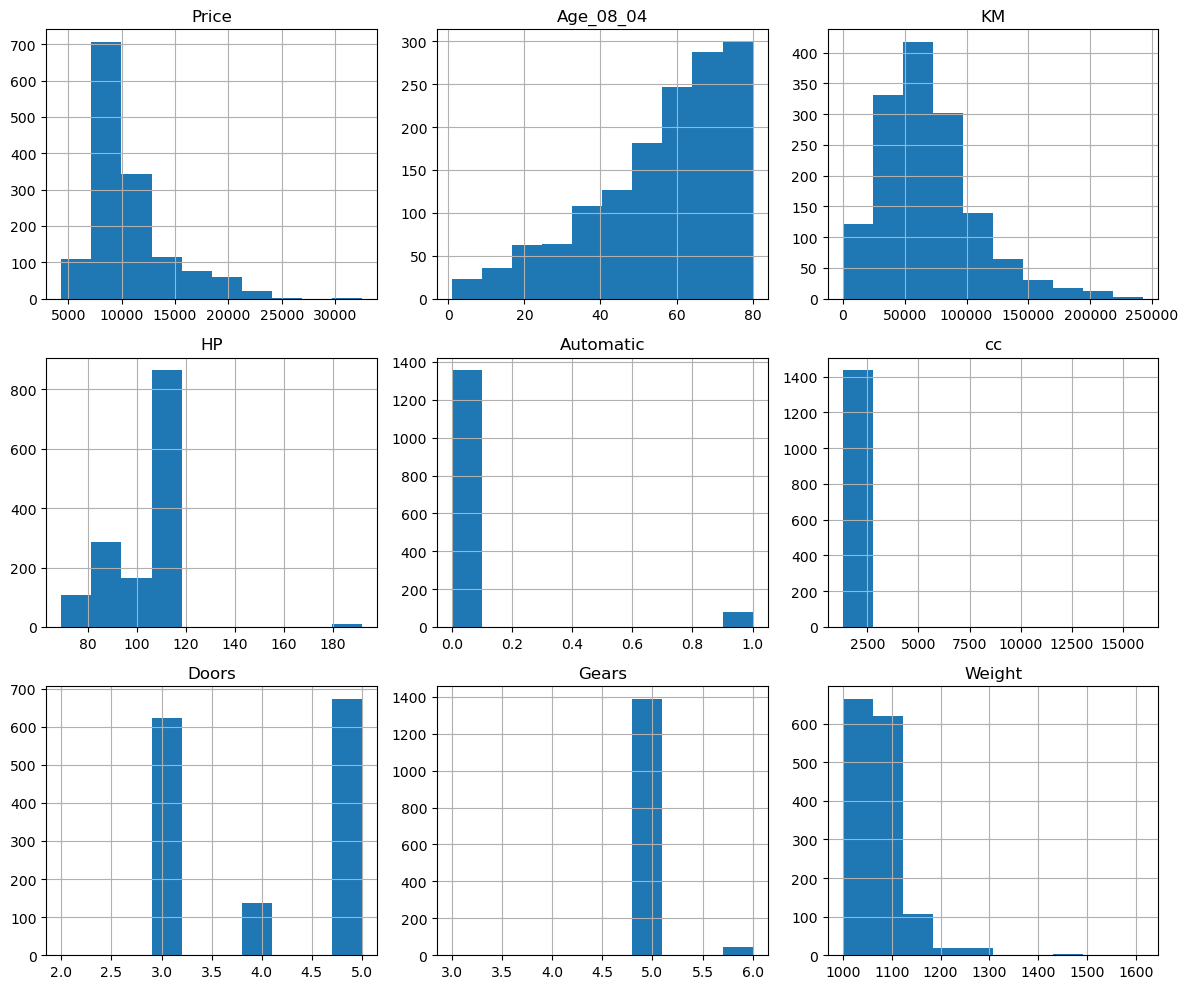

In [13]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

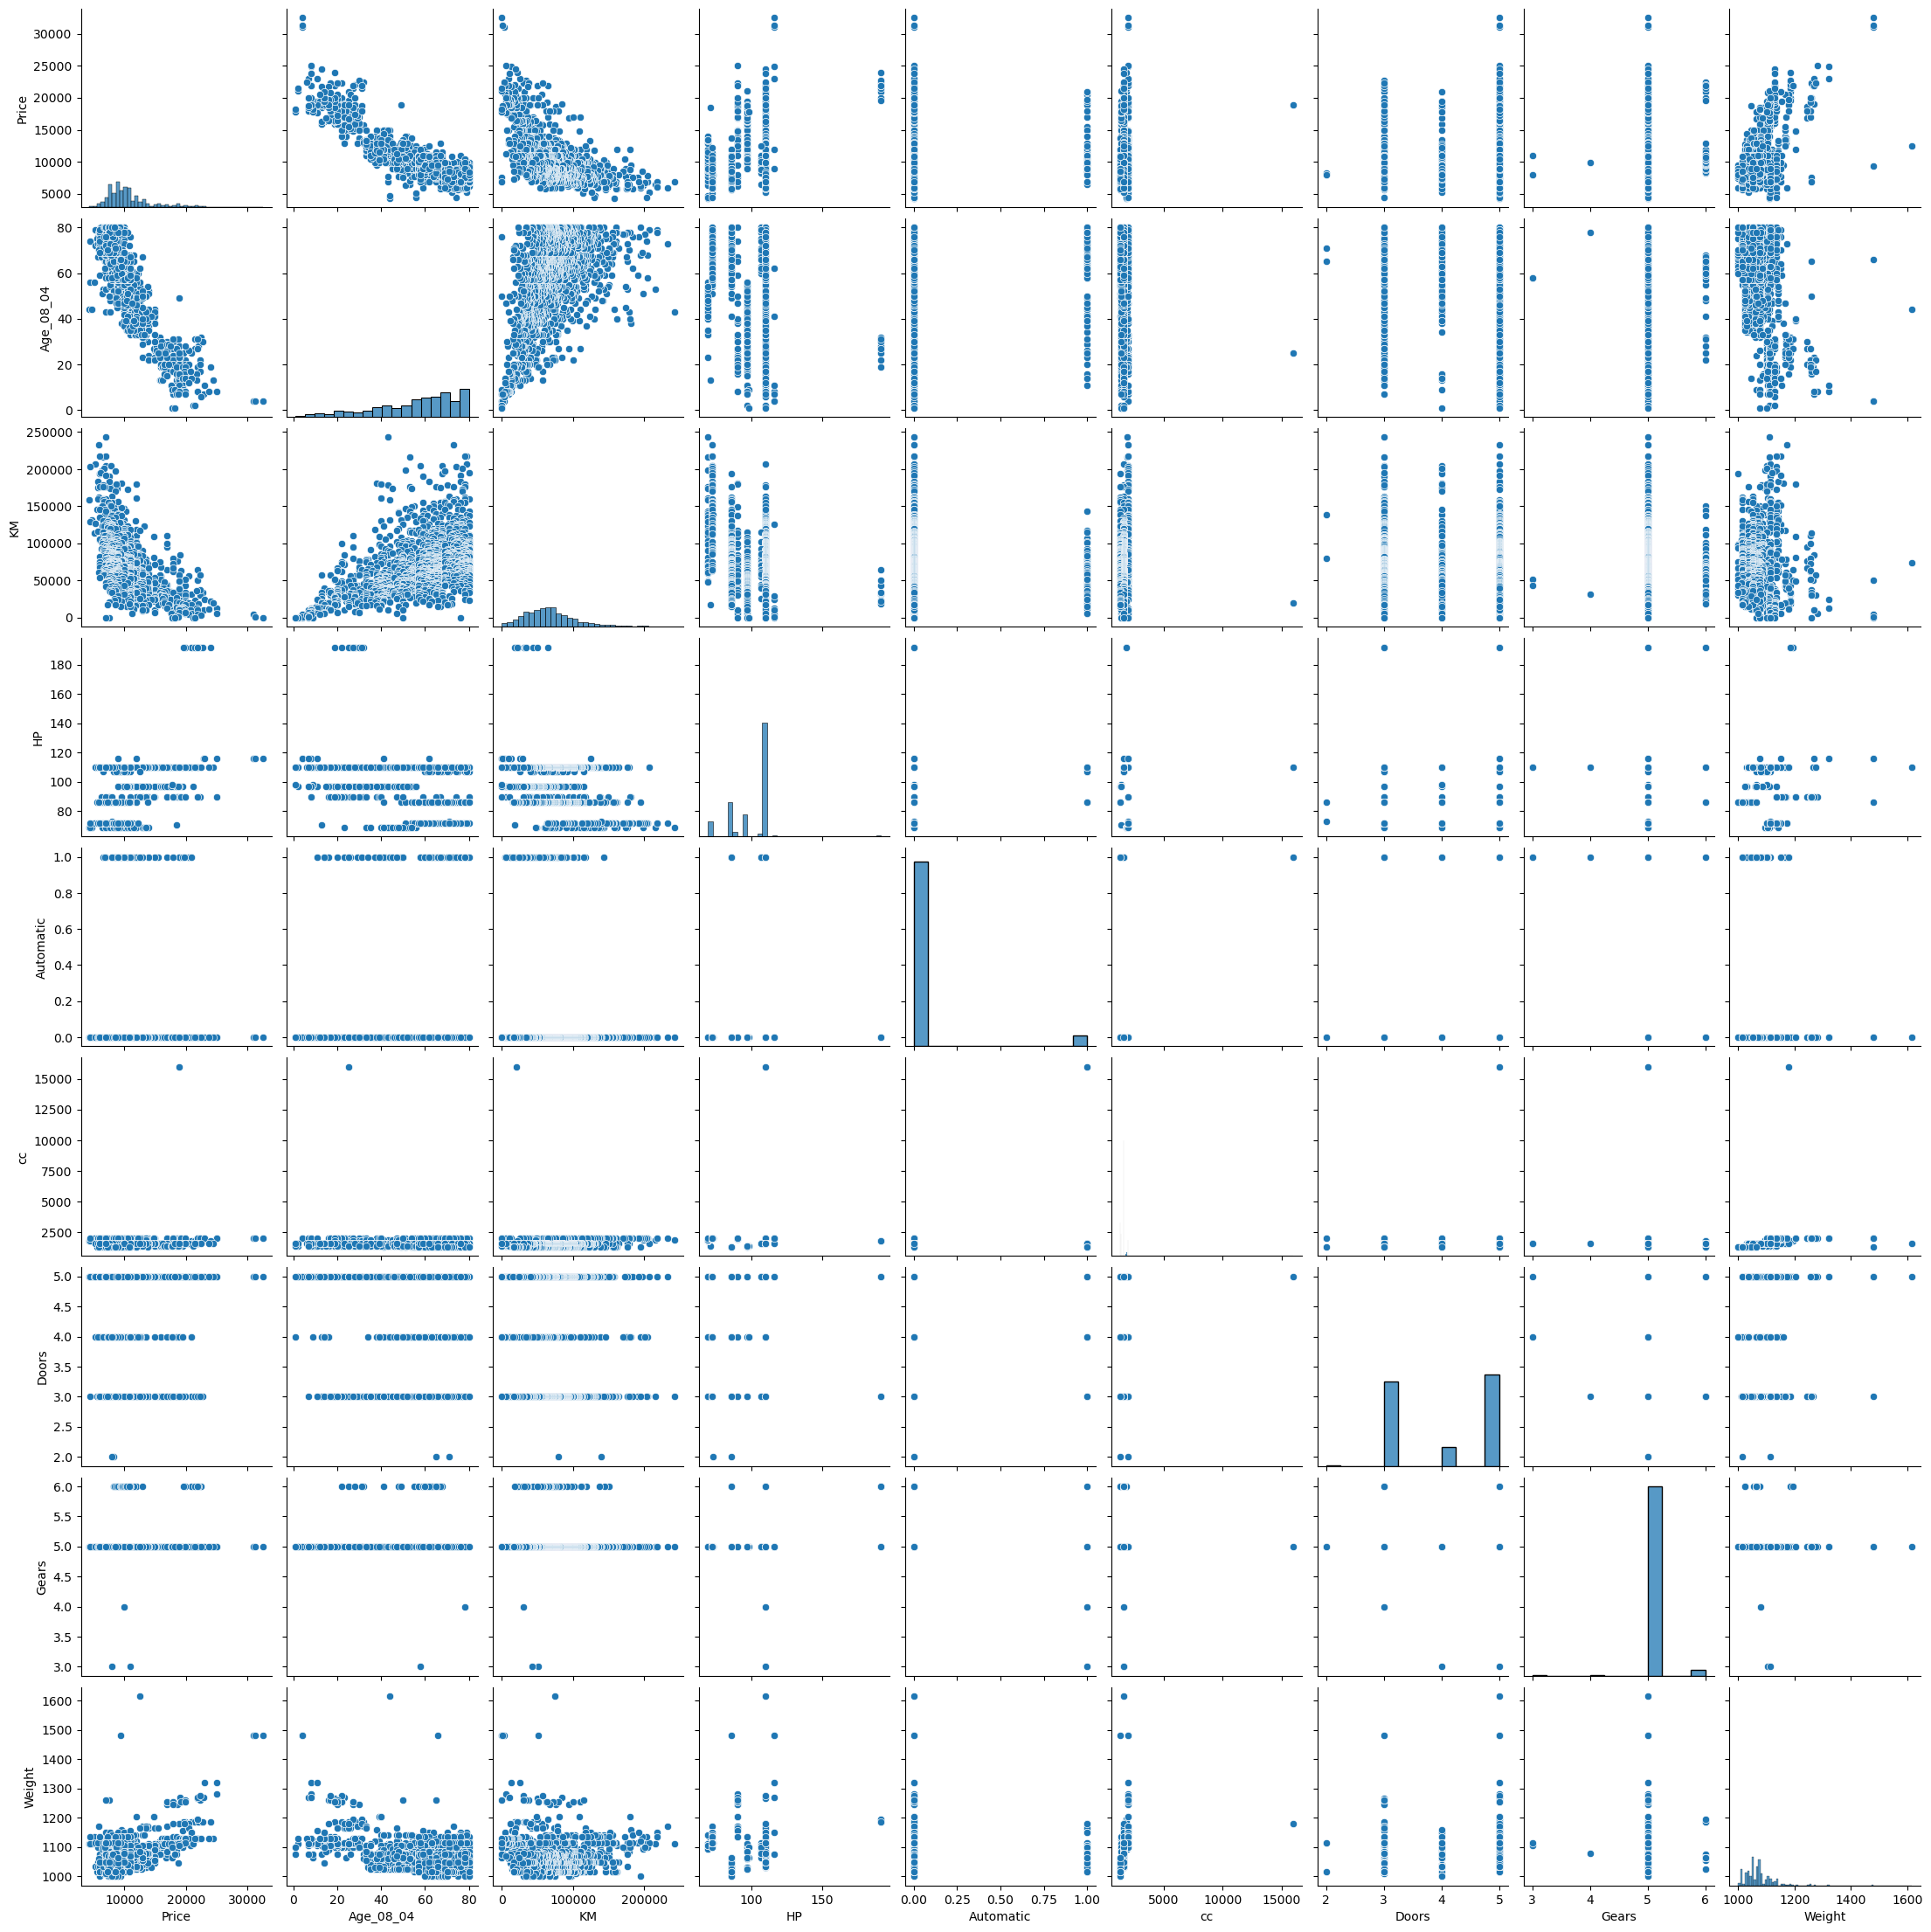

In [14]:
sns.pairplot(data)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15176\4143434226.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


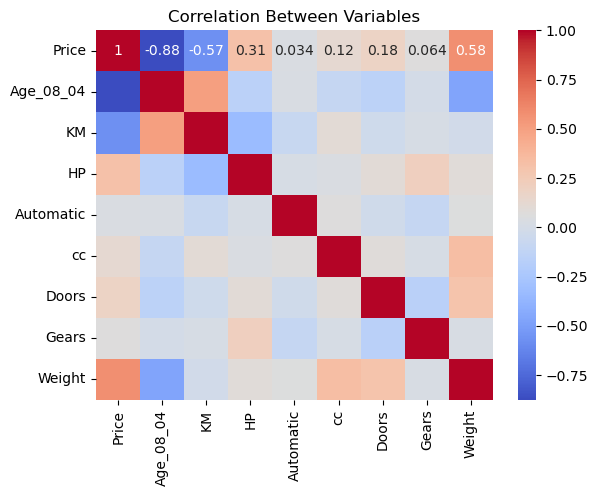

In [15]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder # imported library for label encoder

label_encoder = LabelEncoder()    # Initialize the LabelEncoder
 # Fit and transform the column
data['Category_Encoded'] = label_encoder.fit_transform(data['Fuel_Type'])
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight,Category_Encoded
0,13500,23,46986,Diesel,90,0,2000,3,5,1165,1
1,13750,23,72937,Diesel,90,0,2000,3,5,1165,1
2,13950,24,41711,Diesel,90,0,2000,3,5,1165,1
3,14950,26,48000,Diesel,90,0,2000,3,5,1165,1
4,13750,30,38500,Diesel,90,0,2000,3,5,1170,1


In [17]:
data['Fuel_Type'].value_counts() # shows no of records of particular column in each category 

Petrol    1264
Diesel     154
CNG         17
Name: Fuel_Type, dtype: int64

In [18]:
# imbalanced data in fuel_type
data.drop('Fuel_Type',axis=1,inplace=True) # drop Fuel_type column 

In [19]:
data['Category_Encoded'].unique()

array([1, 2, 0])

# Split Data Set Into Training And Testing

In [20]:
X = data.iloc[:, 1:] # get columns except Price
y = data['Price']   # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1148, 9), (287, 9), (1148,), (287,))

In [21]:
from sklearn.linear_model import LinearRegression # imported library for Linear regression model

model = LinearRegression()         # Initialize the model

model.fit(X_train,y_train)         # Fit the model on training data

yhat_train = model.predict(X_train)  # prediting for train data

model.fit(X_test,y_test)         # Fit the model on test data

yhat_test = model.predict(X_test)  # prediting for test data

In [22]:
from sklearn.metrics import mean_squared_error,r2_score           # imported metrix
import math

train_mse = mean_squared_error(y_train, yhat_train)
train_rmse = math.sqrt(train_mse)
R_squared_train = r2_score(y_train, yhat_train)
print("metrix for Train Data :")
print('mean_squared_error (train) : ',train_mse,'\nRoot_mean_squared_error (train) : ',train_rmse,'\nR-squared (train) : ',R_squared_train )

test_mse = mean_squared_error(y_test, yhat_test)
test_rmse = math.sqrt(test_mse)
R_squared_test = r2_score(y_test, yhat_test)
print("\nmetrix for test Data :")
print('mean_squared_error (test) : ',test_mse,'\nRoot_mean_squared_error (test) : ',test_rmse,'\nR-squared (test) : ',R_squared_test )

metrix for Train Data :
mean_squared_error (train) :  1731672.2780530064 
Root_mean_squared_error (train) :  1315.9301949773044 
R-squared (train) :  0.8694838434310365

metrix for test Data :
mean_squared_error (test) :  1763796.1091833233 
Root_mean_squared_error (test) :  1328.0798579841965 
R-squared (test) :  0.8529818752768972


### Model is fit good on training and testing dataset

In [23]:
### calculating variance Influence factor for multicollinearity

In [24]:
def calculate_vif(X): # define function for vif
    vif = []
    for i in range(X.shape[1]):
        # Using Linear Regression to fit the data
        lr = LinearRegression()
        lr.fit(X.drop(X.columns[i], axis=1), X.iloc[:, i])
        # Calculating VIF
        vif.append(1 / (1 - lr.score(X.drop(X.columns[i], axis=1), X.iloc[:, i])))
    return vif

# Calculating VIF for each feature
vif_values = calculate_vif(X)

# Print VIF values
for i, col in enumerate(X.columns):
    print(f"{col}: {vif_values[i]}")

Age_08_04: 1.9098978580768784
KM: 1.9460695457048023
HP: 1.4878127082003823
Automatic: 1.0628958412191822
cc: 1.1683488825592678
Doors: 1.1859331336207555
Gears: 1.1136131764754875
Weight: 2.3065289530123443
Category_Encoded: 2.371952567514535


### VIF values below 5 generally indicate no multicollinearity problem

In [29]:
import numpy as np
import scipy.stats as stats

# Calculate the residuals
residuals = y_train - yhat_train

# Calculate the sum of squared residuals
RSS = np.sum(residuals**2)

# Number of observations and predictors
n = X_train.shape[0]
p = X_train.shape[1]

# Estimate of the variance of the error term
sigma_squared = RSS / (n - p - 1)

# Add a column of ones to X_train for the intercept
X_train_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

# Calculate the covariance matrix of the coefficients
cov_matrix = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept)
standard_errors = np.sqrt(np.diagonal(cov_matrix) * sigma_squared)

# Get the coefficients (including the intercept)
coefficients = np.hstack([model.intercept_, model.coef_])

# Calculate t-statistics for each coefficient
t_stats = coefficients / standard_errors

# Calculate p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p - 1)) for t in t_stats]

# Create a DataFrame for the p-values
column_names = ['Intercept'] + list(X_train.columns)
p_values_df = pd.DataFrame({
    'Feature': column_names,
    'p-Value': p_values
})

print(p_values_df)

            Feature       p-Value
0         Intercept  1.359245e-02
1         Age_08_04  0.000000e+00
2                KM  0.000000e+00
3                HP  2.401035e-09
4         Automatic  8.907193e-01
5                cc  9.618248e-04
6             Doors  1.704649e-01
7             Gears  6.037251e-08
8            Weight  0.000000e+00
9  Category_Encoded  8.865007e-01


### automatic, doors and Category_Encoded are the columns correlation between price is not good.

In [31]:
print(data['Category_Encoded'].value_counts(),data['Doors'].value_counts(),data['Automatic'].value_counts())  # show unique values in columns with its counts

2    1264
1     154
0      17
Name: Category_Encoded, dtype: int64 5    673
3    622
4    138
2      2
Name: Doors, dtype: int64 0    1355
1      80
Name: Automatic, dtype: int64


In [32]:
#category_Encoded and Automatic column has imbalanced data

In [33]:
# creating a MLR model In with Statsmodels without using the automatic,doors and Category_Encoded columns
# so we have to confirm that these are the good predictors of price or not

In [34]:
X_train["Price"]= y_train  # merge the price column to X_train

In [35]:
import statsmodels.formula.api as smf     # imported stats model
mlr = smf.ols('Price~Category_Encoded',data=X_train)  # initialize the moswl
model2c = mlr.fit()     # fit the model

mlr = smf.ols('Price~Doors',data=X_train)  # initialize the moswl
model2D = mlr.fit()     # fit the model

mlr = smf.ols('Price~Automatic',data=X_train)  # initialize the moswl
model2A = mlr.fit()     # fit the model

mlr = smf.ols('Price~Category_Encoded+Doors+Automatic',data=X_train)  # initialize the moswl
model2ADC = mlr.fit()     # fit the model
# printing R_squared values
print("category_encoded : ",model2c.rsquared ,"\nDoors : ",model2D.rsquared,"\naAutomatic : ",model2A.rsquared,"\nCategory_Encoded+Doors+Automatic : ",model2ADC.rsquared)

category_encoded :  1.833489376834585e-05 
Doors :  0.028840705818011236 
aAutomatic :  0.0027729289197512275 
Category_Encoded+Doors+Automatic :  0.03185491237768856


In [36]:
#Build model
# without using Category_Encoded+Doors+Automatic columns as they are not good predictors of price
mlr = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Weight',data=X_train)  # initialize the moswl
model2 = mlr.fit()                # fit the model

In [37]:
model2.summary()       # model stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1225.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:42:31   Log-Likelihood:                -9891.1
No. Observations:                1148   AIC:                         1.980e+04
Df Residuals:                    1141   BIC:                         1.983e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7803.8379   1534.544     -5.085      0.000   -1.08e+04   -4792.993
Age_08_04   -120.5000      2.922    -41.236      0.000    -126.233    -114.766
KM            -0.0201      0.001    -14.870      0.000      -0.023      -0.017
HP            30.5121      2.891     10.553      0.000      24.839      36.185
cc            -0.1190      0.091     -1.314      0.189      -0.297       0.059
Gears        410.6389    227.979      1.801      0.072     -36.665     857.943
Weight        20.2163      0.973     20.770      0.000      18.307      22.126
==============================================================================
Omnibus:                      134.075   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.170
Skew:                          -0.352   Prob(JB):                    1.93e-171
Kurtosis:                       6.992   Cond. No.                     3.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

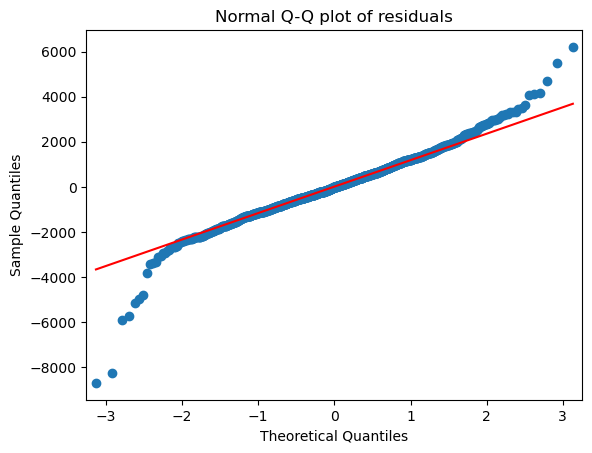

In [38]:
#normal Q-Q plot for residuals
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()                                 

In [39]:
# influence plot
#cooks Distance
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

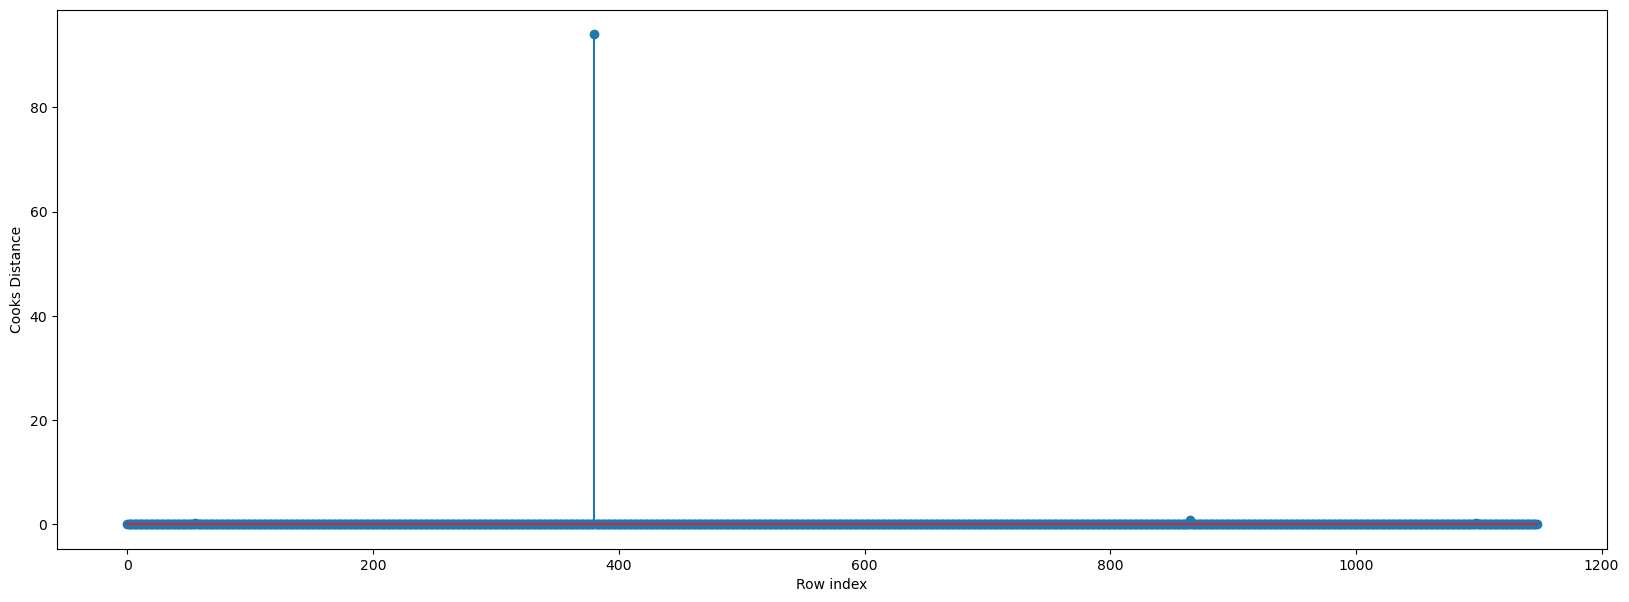

In [40]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(X_train)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(380, 94.04161279111145)

In [42]:
k = X_train.shape[1]
n = X_train.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.028745644599303136

In [43]:
X_train[X_train.index.isin([380])]

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Category_Encoded,Price
380,53,176000,69,0,1900,3,5,1105,1,7000


In [45]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Category_Encoded
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108,1.868990
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882,0.370993
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000,2.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000,2.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000,2.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000,2.000000


In [46]:
df1=X_train.drop(X_train.index[[380]],axis=0).reset_index()

In [47]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [48]:
from sklearn.linear_model import LinearRegression # imported library for Linear regression model

model = LinearRegression()         # Initialize the model

model.fit(X_train,y_train)         # Fit the model on training data

yhat_train = model.predict(X_train)  # prediting for train data

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
import math
train_mse = mean_squared_error(y_train, yhat_train)
train_rmse = math.sqrt(train_mse)

print(train_mse,train_rmse)
print('R-squared:', r2_score(y_train, yhat_train))     # rsquared value for training data

5.0510586567068003e-20 2.2474560411066554e-10
R-squared: 1.0


# 1.What is Normalization & Standardization and how is it helpful?
Normalization
Definition: Normalization rescales the features of the data to a fixed range, typically [0, 1] or [-1, 1].

Formula: 
𝑋𝑛𝑜𝑟𝑚=𝑋−𝑋𝑚𝑖𝑛/𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛X 

where 
X is the original feature, 𝑋𝑚𝑖𝑛 and 𝑋𝑚𝑎𝑥 are the minimum and maximum values of the feature, respectively.

- When to Use:

1. When the data does not follow a Gaussian distribution.
2. When using algorithms that do not assume any distribution of the data, like k-Nearest Neighbors (k-NN), neural networks, and support vector machines.

- Benefits:

1. Puts all features on the same scale, preventing some features from dominating others.
2. Helps gradient-based optimization algorithms converge faster.

# Standardization

Definition: Standardization transforms the data to have a mean of zero and a standard deviation of one.

Formula: 
𝑋𝑠𝑡𝑑=𝑋−𝜇/𝜎

where 

X is the original feature, 
μ is the mean of the feature, and 
σ is the standard deviation of the feature.

- When to Use:

1. When the data follows a Gaussian distribution.
2. When using algorithms that assume a Gaussian distribution of the data, like linear regression, logistic regression, and linear discriminant analysis.

- Benefits:

1. Ensures that the data has a standard normal distribution.
2. Improves the performance of algorithms that are sensitive to the scale of the data.
3. Helps in speeding up convergence in gradient descent-based algorithms.

- How Normalization and Standardization Help

1. Improved Model Performance:

- Both techniques can lead to better model performance by ensuring that features contribute equally to the distance calculations in algorithms like k-NN and clustering methods.

2. Faster Convergence:

- Gradient descent-based algorithms benefit from features being on the same scale, which can lead to faster convergence and reduced training time.

3. Enhanced Interpretability:

- Rescaling features can make the model's coefficients more interpretable, especially in linear models.

4. Stability in Calculations:

- Numerical stability is improved by avoiding very large or very small values that can lead to computational errors.

5. Fair Comparison of Features:

- When features are on the same scale, it becomes easier to compare their relative importance or contribution to the model.

# 2.What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when two or more predictor variables in a multiple linear regression model are highly correlated, leading to unreliable estimates of regression coefficients. To address multicollinearity, you can use several techniques:

1. Remove Highly Correlated Predictors:

- Identify pairs of highly correlated variables using a correlation matrix.
- Remove one variable from each highly correlated pair to reduce redundancy.

2. Principal Component Analysis (PCA):

- Transform the correlated predictors into a smaller set of uncorrelated components.
- Use these components as predictors in the regression model.

3. Partial Least Squares (PLS) Regression:

- Similar to PCA, PLS reduces the predictors to a smaller set of uncorrelated components.
- PLS also considers the response variable when creating components, making it more focused on explaining the variance in the response.

4. Ridge Regression:

- Introduce a penalty term to the regression equation that shrinks the regression coefficients.
- This helps reduce the impact of multicollinearity by adding a degree of bias to the regression estimates.

5. Lasso Regression (Least Absolute Shrinkage and Selection Operator):

- Similar to ridge regression but uses an L1 penalty, which can shrink some coefficients to zero.
- This not only addresses multicollinearity but also performs variable selection.

6. Elastic Net Regression:

- Combines the penalties of both ridge and lasso regression.
- This method is useful when there are multiple predictors with high collinearity and some predictors that need to be selected or excluded.

7. Variance Inflation Factor (VIF):

- Calculate the VIF for each predictor. A VIF value greater than 10 (or 5, depending on the context) indicates high multicollinearity.
- Remove or combine predictors with high VIF values.